# Overview


Perform exploratory data analysis (EDA) on the dataset from Capstone Two  Data Wrangling project. Keep in mind that the goal of the EDA work is to get familiar with the features in your dataset, investigate the relationships between features, and generally understand the core characteristics of your dataset. Be creative and think about interesting figures and plots you can create to help deepen your understanding of the data.

# Data Collection

Download 'food-inspection-violations_1.json' at https://data.world/durhamnc/violation-data
Download 'restaurant-and-services_3.json' and 'restaurant-and-services_4.json' at https://www.kaggle.com/datasets/thedevastator/durham-county-food-inspections/?select=food-health-inspections_2.csv

# Import Packages

In [1]:
# Import relevant libraries and packages.ed
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Load 'food-inspection-violations_1.json' from data.world website as a json file.

# Load JSON file 'food-inspection-violations_1.json' with a context manager
with open('food-inspection-violations_1.json', 'r') as file:
    json_1 = json.load(file)

# Convert json file to dataframe, df1
df1 = pd.json_normalize(json_1)

# Inspect first 3 entries of df1
print(df1.head(3))

# Get summary of information in df1
print(df1.info())

df1.to_csv('inspection.csv', index = False)

  rpt_area_desc                                           comments item  \
0  Food Service  2-301.12 Cleaning Procedure - P2-301.14 When t...    6   
1  Food Service  3-501.19 Time as a Public Health Control - P,P...   22   
2  Food Service  4-501.11 Good Repair and Proper Adjustment-Equ...   45   

  inspection_id critical  weight_sum       id  
0       2385570     None         2.0  5218844  
1       2385570     None         1.0  5218847  
2       2385570     None         2.0  5218851  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158624 entries, 0 to 158623
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rpt_area_desc  153476 non-null  object 
 1   comments       115090 non-null  object 
 2   item           158552 non-null  object 
 3   inspection_id  158624 non-null  object 
 4   critical       29362 non-null   object 
 5   weight_sum     150617 non-null  float64
 6   id             158624 non-null  

In [3]:
# Load 'restaurant-and-services_3.json' from from Kaggle website

# Load JSON file 'restaurant-and-services_3.json' with a context manager
with open('restaurant-and-services_3.json', 'r') as file:
    json_3 = json.load(file)

# Convert json file to dataframe, df3
df3 = pd.json_normalize(json_3)

# Get summary of information in df1
print(df3.info())

# Check type json_3
type(json_3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type_description        2463 non-null   object 
 1   est_group_desc          1017 non-null   object 
 2   opening_date            2463 non-null   object 
 3   premise_phone           1893 non-null   object 
 4   premise_address1        2463 non-null   object 
 5   premise_address2        91 non-null     object 
 6   seats                   1765 non-null   float64
 7   id                      2463 non-null   object 
 8   premise_state           2463 non-null   object 
 9   transitional_type_desc  2463 non-null   object 
 10  status                  2463 non-null   object 
 11  premise_zip             2463 non-null   object 
 12  risk                    2463 non-null   int64  
 13  insp_freq               2463 non-null   int64  
 14  premise_city            2463 non-null   

list

In [4]:
# Load 'restaurant-and-services_4.json' from Kaggle website

# Load JSON file 'restaurant-and-services_4.json' with a context manager
with open('restaurant-and-services_4.json', 'r') as file:
    json_4 = json.load(file)

# Convert json file to dataframe, df3
df4 = pd.json_normalize(json_4)

# Get summary of information in df1
print(df4.info())

# Check type json_3
type(json_4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      1 non-null      object
 1   features  1 non-null      object
dtypes: object(2)
memory usage: 148.0+ bytes
None


dict

From the data wrangling capstone assignment https://github.com/eliza-hoppy/-Capstone-Two-Github-Repo/blob/main/Capstone_Two_Data_Wrangling_Durham_County_Health_Inspection_ipynb_FINAL_11_29_23.ipynb we remember that json_3 and json_4 have similar entries. However json_3 is a list while json_4 is a dictionary. We will move forward with EDA using json_3 only.

In this analysis, we are interested in inspection results of food service establishments. We will filter df1 and df3 on observations that deal with food service establishments.

In [5]:
# Find out observations related to food service establishments in df1 by determining unique entries in rtp_area_desc
print(df1.rpt_area_desc.unique())

['Food Service' 'Mobile Food' 'School Buildings' 'Institutions' None
 'Day Care' 'Lodging' 'Residential Care' 'Swimming Pools' 'Summer Camps'
 'Local Confinement' 'Adult Day Care' 'Bed&Breakfast Inn'
 'Tattoo Establishments' 'Bed&Breakfast Home']


In [6]:
# Find out establishment group descriptions in df3
print(df3.est_group_desc.unique())

['Elementary School' None 'Fast Food Restaurant' 'Full-Service Restaurant'
 'Nursing Home' 'Meat and Poultry Department'
 'Produce Department and Salad Bar' 'Hospital' 'Deli Department'
 'Seafood Department']


In [7]:
df1['id'] = df1['id'].astype(int)
df3['id'] = df3['id'].astype(int)


In [8]:
print('Inspection Comments DataFrame - ' +  'ID Min: ' + str(df1['id'].min()) + ', ' + 'ID Max: ' + str(df1['id'].max()))
print('Restaurant Details DataFrame - ' +  'ID Min: ' + str(df3['id'].min()) + ', ' + 'ID Max: ' + str(df3['id'].max()))

Inspection Comments DataFrame - ID Min: 733795, ID Max: 6882810
Restaurant Details DataFrame - ID Min: 55461, ID Max: 193424


Unable to match the restaurant information dataframe df3 to the inspection information dataframe on their id columns because the ids are out of range. In the future analysis we will look into if there is a possibility to join both dataframes on id by reaching out to the Durham County Department of Public Health.

In [9]:
# Remove the geolocation column because it is empty and all geolocation data is in the longitude and latitude columns of df3.
df3 = df3.loc[:, df3.columns != 'geolocation']

We will plot locations of restaurants and service establishments around the Durham area.

In [10]:
# Install all the dependencies for installing geopandas
#conda install pandas fiona shapely pyproj rtree

In [11]:
# Install geopandas from the conda-forge channel
#conda install --channel conda-forge geopandas

In [12]:
# Import geopandas and Point packages
import geopandas as gpd
from shapely.geometry import Point

# Read the shapefile from the folder
durham = gpd.read_file('Durham_County_Boundary.shp')

C:\Users\fabby\anaconda3\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


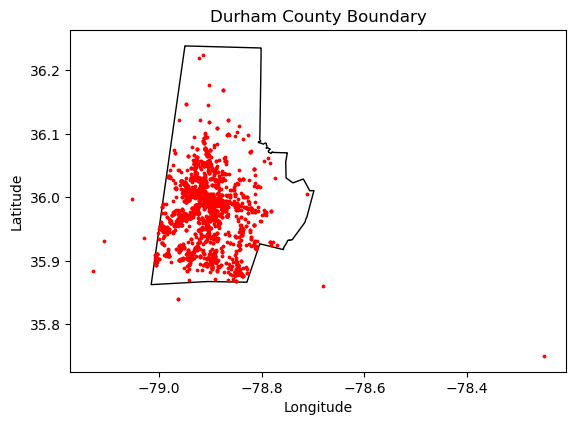

In [13]:
# Create a dataframe with location of inspection sites using Point package
points = [Point(x,y) for (x, y) in zip(df3['geolocation.lon'], df3['geolocation.lat'])]
insp_sites ={'location': df3['premise_name'], 'geometry': points}
insp_sites = gpd.GeoDataFrame(insp_sites, crs = 4326)


#Plot the map of durham county and overlay the locations of the inspection sits.
fig, ax = plt.subplots()
durham.plot(ax = ax, color = 'white', edgecolor = 'black' )
insp_sites.plot(ax = ax, marker = 'o', color = 'r', markersize = 3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Durham County Boundary')
plt.show()

The 'comments' column of the inspections dataframe, df1, first a violation code. Some of these violations are from the 2021 North Carolina Food Code (https://ehs.dph.ncdhhs.gov/faf/docs/foodprot/NC-FoodCodeManual-2021-FINAL-10-1-2021.pdf). We will extract these sections and complete an analysis on them. The food code sections occur in the format X-YYY-ZZ. X is the chapter, YYY is the subpart, and ZZ is the section. Please refer to the table of contents in the link above to see the sections.


We will first attempt to find the unique sections which appear in the comments on violations in df1 by isolating the first 8 characters of each row in the 'comments' column.

In [14]:
# Isolate the food code section from comments by isolating the first 8 characters of the string in the 'comments column'.
# Then look at the unique food code sections.
df1['Food Code Section'] = df1['comments'].str[0:8]
print(df1['Food Code Section'])
df1['Food Code Section'].unique()

0         2-301.12
1         3-501.19
2         4-501.11
3         4-602.13
4         •6-301.1
            ...   
158619    3-501.17
158620    6-501.14
158621    Operator
158622    4-602.13
158623    4-601.11
Name: Food Code Section, Length: 158624, dtype: object


array(['2-301.12', '3-501.19', '4-501.11', ..., '... 4-30', '- -6-501',
       'i. 3-501'], dtype=object)

We see that there are ~16,000 unique sections. This is driven by variety of sections seen but also by different formatting and incorrect entries. 

In [15]:
df1['Food Code Section'].mode()

0    4-501.11
Name: Food Code Section, dtype: object

The majority of the violations come from the __Good Repair and Proper Adjustment__ section. However, we will clean the notebook up to remove observations that have no comments, and then split the sections available into columns, 'Chapter', 'Subpart', and 'Section'. Observations missing any of these three pieces of information will be deleted. 

Then we will re-create Food Code Sections from these 3 parts and analyze the sections.

In [16]:
# Check the shape of the inspections data frame.
df1.shape

(158624, 8)

In [17]:
# Create new columns Chapter, Subpart and Section using the food code sections listed in the comments section
df1[['FC_Chapter','FC_Subpart', 'FC_Section']] = df1['comments'].str.extract('([0-9]+)(?:-)([0-9]+)(?:.)([0-9]+)')
df1.head()

,rpt_area_desc,comments,item,inspection_id,critical,weight_sum,id,Food Code Section,FC_Chapter,FC_Subpart,FC_Section
0,Food Service,2-301.12 Cleaning Procedure - P2-301.14 When t...,6,2385570,None,2.0,5218844,2-301.12,2,301,12
1,Food Service,"3-501.19 Time as a Public Health Control - P,P...",22,2385570,None,1.0,5218847,3-501.19,3,501,19
2,Food Service,4-501.11 Good Repair and Proper Adjustment-Equ...,45,2385570,None,2.0,5218851,4-501.11,4,501,11
3,Food Service,4-602.13 Nonfood Contact Surfaces - CCLEAN ALL...,47,2385570,None,1.0,5218852,4-602.13,4,602,13
4,Mobile Food,•6-301.14 Handwashing Signage - C: Post the gi...,8,2385592,None,1.0,5218926,•6-301.1,6,301,14


In [18]:
# Rejoin the Chapter, Subpart and Section columns to create a column called 'Formatted_FC_Section'
df1['Formatted_FC_Section'] = df1['FC_Chapter'] + '-' + df1['FC_Subpart'] + '.' + df1['FC_Section']

# Create new dataframe df that removes unformatted column 'Food Code Section'

df1 = df1.loc[:, df1.columns != 'Food Code Section']
df1.head()

,rpt_area_desc,comments,item,inspection_id,critical,weight_sum,id,FC_Chapter,FC_Subpart,FC_Section,Formatted_FC_Section
0,Food Service,2-301.12 Cleaning Procedure - P2-301.14 When t...,6,2385570,None,2.0,5218844,2,301,12,2-301.12
1,Food Service,"3-501.19 Time as a Public Health Control - P,P...",22,2385570,None,1.0,5218847,3,501,19,3-501.19
2,Food Service,4-501.11 Good Repair and Proper Adjustment-Equ...,45,2385570,None,2.0,5218851,4,501,11,4-501.11
3,Food Service,4-602.13 Nonfood Contact Surfaces - CCLEAN ALL...,47,2385570,None,1.0,5218852,4,602,13,4-602.13
4,Mobile Food,•6-301.14 Handwashing Signage - C: Post the gi...,8,2385592,None,1.0,5218926,6,301,14,6-301.14


In [19]:
# Drop columns from df which have empty columns for 'FC_Subpart', 'FC_Chapter' or 'FC_Section'
df1.dropna(subset = ['FC_Subpart', 'FC_Chapter', 'FC_Section'], inplace = True)
# Check that there are none null values in df for the 3 columns.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53024 entries, 0 to 158623
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rpt_area_desc         52937 non-null  object 
 1   comments              53024 non-null  object 
 2   item                  53022 non-null  object 
 3   inspection_id         53024 non-null  object 
 4   critical              475 non-null    object 
 5   weight_sum            53008 non-null  float64
 6   id                    53024 non-null  int32  
 7   FC_Chapter            53024 non-null  object 
 8   FC_Subpart            53024 non-null  object 
 9   FC_Section            53024 non-null  object 
 10  Formatted_FC_Section  53024 non-null  object 
dtypes: float64(1), int32(1), object(9)
memory usage: 4.7+ MB


In [20]:
# Check the unique values in 'Formatted_FC Section'
df1['Formatted_FC_Section'].unique()

array(['2-301.12', '3-501.19', '4-501.11', '4-602.13', '6-301.14',
       '3-603.11', '5-205.11', '6-501.114', '6-303.11', '4-402.12',
       '2-201.11', '2-301.16', '4-501.111', '5-103.11', '5-501.110',
       '3-306.11', '3-501.16', '3-304.12', '5-501.17', '5-202.12',
       '4-602.11', '3-501.17', '3-302.12', '5-205.15', '6-201.11',
       '2-103.11', '6-501.12', '4-601.11', '3-304.14', '4-502.11',
       '6-301.11', '3-201.11', '4-903.11', '3-305.11', '2-402.11',
       '6-501.14', '3-502.11', '6-501.16', '4-101.19', '4-205.10',
       '2-102.12', '4-302.14', '2-201.12', '3-303.12', '4-501.115',
       '4-901.11', '2-301.14', '7-102.11', '3-501.15', '6-501.11',
       '4-302.12', '6-501.18', '5-502.11', '2-401.11', '3-203.12',
       '3-501.14', '3-203.11', '3-202.16', '6-202.13', '7-204.11',
       '6-501.111', '128-1.0', '8-103.11', '4-201.11', '5-501.16',
       '6-301.12', '4-203.12', '6-305.11', '3-501.13', '6-304.11',
       '5-501.114', '4-101.16', '5-501.15', '80-1.0', '50-

Some of the sections chapters and subpart codes seem to be out of place as they do not align with sections of the food code. This could be due to incorrect entries **or** these could be violation codes not related to the food code. Since the main analysis for this EDA will look mainly at food code violations, we will filter out those codes which do not appear in the NC Food Code. A future analysis may look at classifying the violations based on the actual 'comments' text to instead of using the violation codes. This would allow us to classify violations which are missing codes in the comments, or violations which do not appear in the food code. 

In [21]:
# Import the 'NC_Food_Code_202.xlsx' file.
df2 = pd.read_excel(r"C:\Users\fabby\OneDrive\Springboard\Capstone_2_Exploratory_Data_Analysis\NC_Food_Code_2021.xlsx")
df2.head()

,Part,Chapter,Chapter Description,Overall Subpart Heading,Subpart Heading
0,1-101,1,Purpose and Definitions,"Title, Intent, Scope",Title
1,1-102,1,Purpose and Definitions,"Title, Intent, Scope",Intent
2,1-103,1,Purpose and Definitions,"Title, Intent, Scope",Scope
3,1-201,1,Purpose and Definitions,Definitions,Applicability and Terms Defined
4,2-101,2,Management and Personnel,Supervision,Responsibility


In [22]:
#Create a header for Subpart # in df2
df2[['Subpart']] = df2['Part'].str.extract('(?:-)([0-9]+)')
df2.head()

,Part,Chapter,Chapter Description,Overall Subpart Heading,Subpart Heading,Subpart
0,1-101,1,Purpose and Definitions,"Title, Intent, Scope",Title,101
1,1-102,1,Purpose and Definitions,"Title, Intent, Scope",Intent,102
2,1-103,1,Purpose and Definitions,"Title, Intent, Scope",Scope,103
3,1-201,1,Purpose and Definitions,Definitions,Applicability and Terms Defined,201
4,2-101,2,Management and Personnel,Supervision,Responsibility,101


In [23]:
# Find entries of df1['Formatted_FC_Section'] that appear in df2['Part']

# Extract chapters and subparts from df1 and store in a df called sections
sections = df1['Formatted_FC_Section'].str.extract('([0-9]+)(?:-)([0-9]+)')
sections['Parts'] = sections[0] + '-' + sections[1]

# Find sections that appear in the Food Code by comparing to df2['Part']
real_sections = sections['Parts'].isin(df2['Part'])
df1 = df1[real_sections]
print(df1['Formatted_FC_Section'].unique())

['2-301.12' '3-501.19' '4-501.11' '4-602.13' '6-301.14' '3-603.11'
 '5-205.11' '6-501.114' '6-303.11' '4-402.12' '2-201.11' '2-301.16'
 '4-501.111' '5-103.11' '5-501.110' '3-306.11' '3-501.16' '3-304.12'
 '5-501.17' '5-202.12' '4-602.11' '3-501.17' '3-302.12' '5-205.15'
 '6-201.11' '2-103.11' '6-501.12' '4-601.11' '3-304.14' '4-502.11'
 '6-301.11' '3-201.11' '4-903.11' '3-305.11' '2-402.11' '6-501.14'
 '3-502.11' '6-501.16' '4-101.19' '4-205.10' '2-102.12' '4-302.14'
 '2-201.12' '3-303.12' '4-501.115' '4-901.11' '2-301.14' '7-102.11'
 '3-501.15' '6-501.11' '4-302.12' '6-501.18' '5-502.11' '2-401.11'
 '3-203.12' '3-501.14' '3-203.11' '3-202.16' '6-202.13' '7-204.11'
 '6-501.111' '8-103.11' '4-201.11' '5-501.16' '6-301.12' '4-203.12'
 '6-305.11' '3-501.13' '6-304.11' '5-501.114' '4-101.16' '5-501.15'
 '6-201.13' '2-303.11' '4-702.11' '3-501.18' '3-301.11' '6-201.16'
 '3-302.11' '3-304.15' '3-307.11' '5-403.12' '4-204.117' '5-203.12'
 '5-501.115' '5-302.16' '5-501.113' '3-202.14' '5-402.1

Join df1 and df2 on the Chapter and Subpart columns to gain to get informationon the chapter and subpart descriptions.

In [24]:
df1['Part'] = df1['FC_Chapter'] + '-' + df1['FC_Subpart']


In [25]:
df = pd.merge(df1, df2, on = 'Part', how = 'inner')
df.head(3)

,rpt_area_desc,comments,item,inspection_id,critical,weight_sum,id,FC_Chapter,FC_Subpart,FC_Section,Formatted_FC_Section,Part,Chapter,Chapter Description,Overall Subpart Heading,Subpart Heading,Subpart
0,Food Service,2-301.12 Cleaning Procedure - P2-301.14 When t...,6,2385570,None,2.0,5218844,2,301,12,2-301.12,2-301,2,Management and Personnel,Personal Cleanliness,Hands and Arms,301
1,Mobile Food,| 2-301.16 Hand Antiseptics - PF: Provide hand...,6,2385983,None,0.0,5220038,2,301,16,2-301.16,2-301,2,Management and Personnel,Personal Cleanliness,Hands and Arms,301
2,Food Service,2-301.14 When to Wash - P PIc is to monitor co...,6,2389163,None,0.0,5229290,2,301,14,2-301.14,2-301,2,Management and Personnel,Personal Cleanliness,Hands and Arms,301


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51994 entries, 0 to 51993
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rpt_area_desc            51994 non-null  object 
 1   comments                 51994 non-null  object 
 2   item                     51994 non-null  object 
 3   inspection_id            51994 non-null  object 
 4   critical                 252 non-null    object 
 5   weight_sum               51994 non-null  float64
 6   id                       51994 non-null  int32  
 7   FC_Chapter               51994 non-null  object 
 8   FC_Subpart               51994 non-null  object 
 9   FC_Section               51994 non-null  object 
 10  Formatted_FC_Section     51994 non-null  object 
 11  Part                     51994 non-null  object 
 12  Chapter                  51994 non-null  int64  
 13  Chapter Description      51994 non-null  object 
 14  Overall Subpart Headin

The key variables of interest are the rpt_area_desc, food code chapter, food code subpart, and the critical violations. We will create plots of these variables.

C:\Users\fabby\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


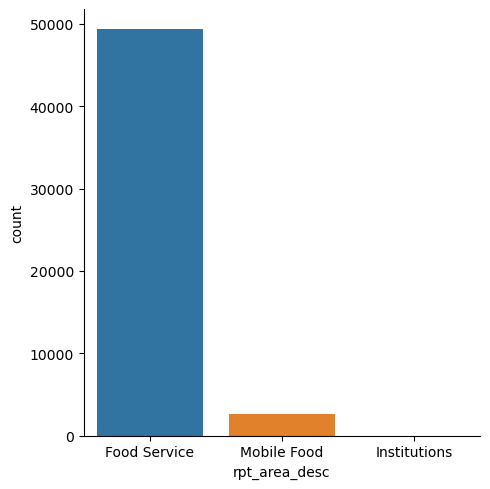

In [27]:
# Create a categorical plot of the rpt_area_desc, chapter description, and subpart heading.
g = sns.catplot(x = 'rpt_area_desc', kind = 'count', data = df)

After the removal of observations where the violations do not appear in the food code, food service, mobile food and institutions are the only establishments left with violations. Food service establishments take the majority of these violations. We will look at what chapter of the food code majority of the violations appear in.

C:\Users\fabby\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


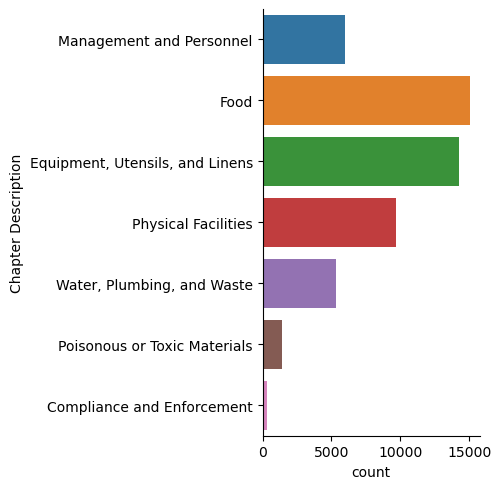

In [28]:
# Create at sns categorical plot showing counts of violations from each of the food code chapters.
g = sns.catplot(y = 'Chapter Description', kind = 'count', data = df)

Majority of the violations come from the Food, Equipment, Utensils, and Linens, Physical Facilities and Management and Personnel chapters. We will find the 3 highest violations in each of these chapters.

Text(0.5, 1.0, 'Food - Chapter 3 Violations')

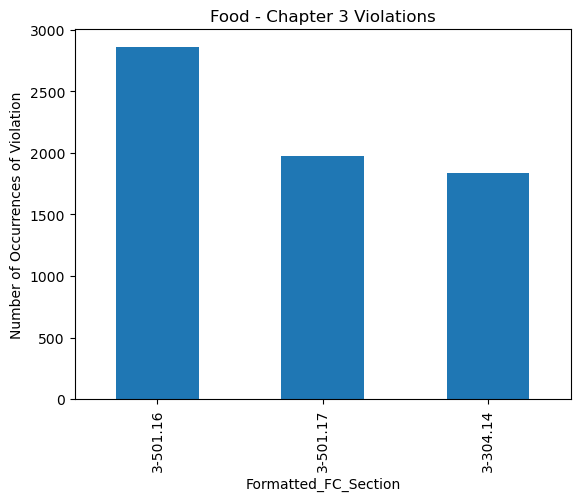

In [29]:
# Create the food dataframe 
df_c3 = df[df['Chapter Description'] == 'Food']

# Plot the 3 highest violation sections in the food chapter
df_c3['Formatted_FC_Section'].value_counts().iloc[0:3].plot(kind = 'bar')
plt.ylabel('Number of Occurrences of Violation')
plt.title('Food - Chapter 3 Violations')

Text(0.5, 1.0, 'Equipment, Utensils, and Linens - Chapter 4 Violations')

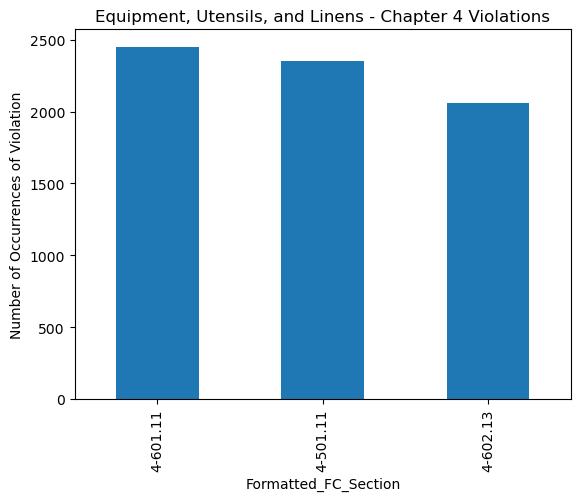

In [30]:
# Create the 'Equipment, Utensils, and Linens' dataframe 
df_c4 = df[df['Chapter Description'] == 'Equipment, Utensils, and Linens']

# Plot the 3 highest violation sections in the 'Equipment, Utensils, and Linens'chapter
df_c4['Formatted_FC_Section'].value_counts().iloc[0:3].plot(kind = 'bar')
plt.ylabel('Number of Occurrences of Violation')
plt.title('Equipment, Utensils, and Linens - Chapter 4 Violations')

Text(0.5, 1.0, 'Physical Facilities - Chapter 6 Violations')

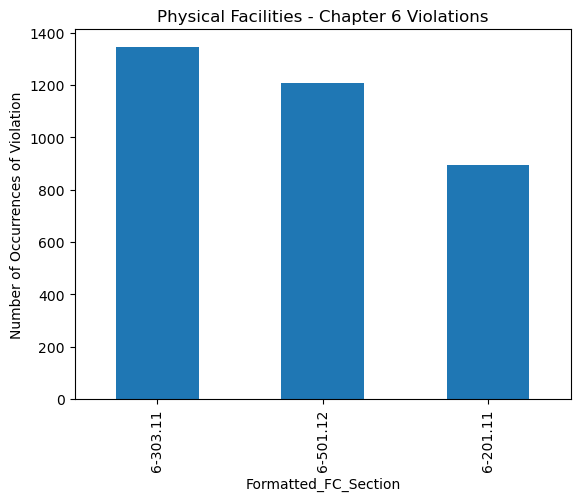

In [31]:
# Create the 'Physical Facilities' dataframe 
df_c6 = df[df['Chapter Description'] == 'Physical Facilities']

# Plot the 3 highest violation sections in the 'Physical Facilities' chapter
df_c6['Formatted_FC_Section'].value_counts().iloc[0:3].plot(kind = 'bar')
plt.ylabel('Number of Occurrences of Violation')
plt.title('Physical Facilities - Chapter 6 Violations')

Text(0.5, 1.0, 'Management and Personnel - Chapter 2 Violations')

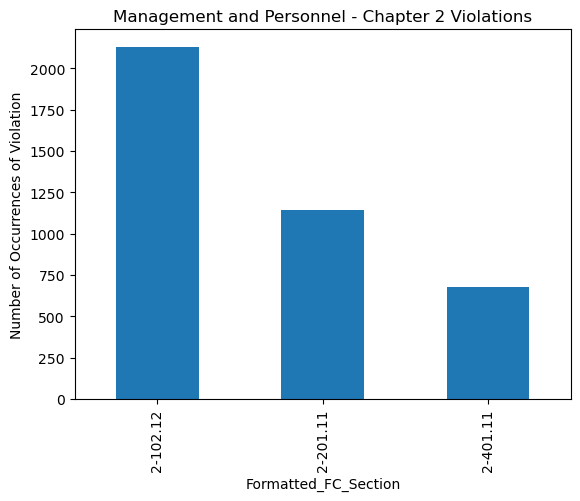

In [32]:
# Create the 'Management and Personnel' dataframe 
df_c2 = df[df['Chapter Description'] == 'Management and Personnel']

# Plot the 3 highest violation sections in the 'Management and Personnel'' chapter
df_c2['Formatted_FC_Section'].value_counts().iloc[0:3].plot(kind = 'bar')
plt.ylabel('Number of Occurrences of Violation')
plt.title('Management and Personnel - Chapter 2 Violations')

Based on the plots we see that in the Food category, most violations deal with 'Time /Temperature COntrol for Safety Food, Hot and Cold Holding. 
For the Equipment, Utensils, and Linen category. it is for ' Equipment, Food-Contact Surfaces, NonfoodContact Surfaces, and Utensils.'. 
For the Physical Facilities category the highest violation is from the Light Intensity section.
Finally, in the Management and Personnel category the most violations come from the Certified Food Protection Manager chapter.

Let us find what section of the food code most of the critical violations came from.

<Axes: xlabel='Formatted_FC_Section'>

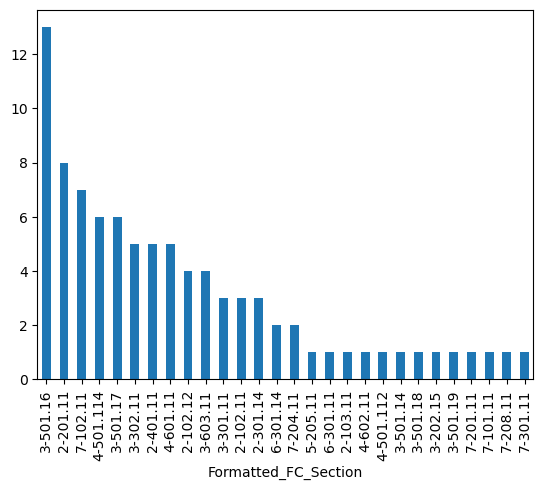

In [33]:
# Filter the dataframe on observations where critical violations were found.
df5 = df[df['critical'] == 'Y']
# Plot the the sections where the critical violations came from
df5['Formatted_FC_Section'].value_counts().plot(kind = 'bar')

There were 89 critical violations in the dataset and 13 of those came from Time/Temperature Control for Safety Food, Hot and Cold Holding. This is the same section where majority of the violations  in the data set came from. There is an opportunity to train and reduce the number of violations in this category.

# Next Steps
For future analysis it would be interesting to understand if the restaurants in df3 can be linked to the inspection data in df. From there we can analyze the comments in df to understand what specific actions are leading to violations. Also it would be interesting to complete a cluster analysis to see if specific violations are linked to specific types of establishments (food service vs. mobile food and so on). It would be helpful to understand which establishments are running into critical violations and why.